In [1]:
from scmodels import SCM
import random, math

In [2]:
def get_distributions():
    ep = .1
    dists = [
        f"LogLogistic(alpha={random.randint(5, 20)}, beta={round(random.uniform(1,3.5),1)})",
        f"Normal(mean={random.randint(0,10)}, std={round(random.uniform(1,20),2)})",
        f"LogNormal(mean={random.randint(0,10)}, std={round(random.uniform(1,20),2)})",
        f"Benini(alpha={round(random.random() + ep, 1)}, beta={round(random.random() + ep, 1)}, sigma={round(random.random() + ep, 1)})",
        f"Beta(alpha={round(random.random() + ep, 1)}, beta={round(random.random() + ep, 1)})",
        f"Exponential(rate={round((random.random() + ep) * 10, 1)})",
        f"FDistribution(d1={random.randint(2, 4)}, d2={random.randint(5, 8)})",
        f"Gamma(k={round((random.random() + ep) * 4, 1)}, theta={round((random.random() + ep) * 8, 1)})",
        f"GammaInverse(a={round((random.random() + ep) * 4, 1)}, b={round((random.random() + ep) * 8, 1)})",
        f"Bernoulli({round(random.random(), 1)})",
        f"Binomial(n={random.randint(2, 10)}, p={round(random.random(), 1)}, succ={random.randint(3, 20)}, fail={random.randint(3, 20)})",
        f"BetaBinomial(n={random.randint(10, 100)}, alpha={round(random.random() + ep, 1)}, beta={round(random.uniform(2, 5),1)})",
        f"Die(sides={random.randint(4, 10)})",
        f"DiscreteUniform(items='1 2 3')",
        f"Geometric(p={round(random.random(), 2)})",
        f"Poisson(lamda={round(random.random() + ep, 1)})",
        f"FiniteRV({{{random.randint(5, 10)}: 1/2, {random.randint(0, 3)}: 1/6, {random.randint(15, 25)}: 1/6, {random.randint(30, 50)}: 1/6}})"
    ]
    
    return dists

In [3]:
def get_child_distribution(parents):
    simple_ops = ["+", "*", "-"]
    complex_ops = [False, "sqrt"]
    noise_ops = [True, False]
    dist = f"{parents[0]}"
    count = 0
    for p in parents[1:]:
        op = random.sample(simple_ops, 1)[0]
        dist = f"{dist} {op} {p}"
        count += 1
        
        if count > 2:
            op = random.choices(complex_ops, weights=(500, 5), k=1)[0]
            if op:
                dist = f"{op}({dist})"
        
        op = random.choices(noise_ops, weights=(10, 90), k=1)[0]
        if op:
            dist = f"{dist} * N"
    
    dist = f"{dist} * N"
    return dist

In [4]:
def get_parents(levels_and_distributions):
    parent_levels = random.randint(1,len(levels_and_distributions))
    parents = []
    for level in range(parent_levels):
        possible_parents = levels_and_distributions[level][1]
        num_parents = random.randint(1, len(possible_parents))
        parents.extend(random.sample(possible_parents, num_parents))
    
    return parents

In [5]:
def populate_level_distributions(level, level_data, levels_and_distributions):
    level_dists = []
    dist_names = []
    for n in range(level_data['num']):
        name = level_data['name']+str(n+1)
        
        if level == 0:
            dist = "N"
        else:
            dist = get_child_distribution(get_parents(levels_and_distributions))
            
        dist = f"{name} = {dist}, N ~ {random.sample(get_distributions(), 1)[0]}"
        level_dists.append(dist)
        dist_names.append(name)
    
    levels_and_distributions[level] = (level_dists, dist_names)

In [6]:
def create_names_and_num_nodes_dict(nodes_per_level, level_names):
    level_name_numnodes = {}
    for n, name in enumerate(level_names):
        level_name_numnodes[n] = {'name': name, 'num': nodes_per_level[n]}
        
    return level_name_numnodes

In [7]:
def create_scm_from_nodes_list(nodes_list):
    level_names = get_level_names(nodes_per_level)
    level_name_numnodes = create_names_and_num_nodes_dict(nodes_per_level, level_names)

In [8]:
def get_level_names(numnodes_per_level):
    level_names = []
    for n in range(len(numnodes_per_level)):
        level_names.append(chr(65 + n))
    
    return level_names

In [9]:
def get_numnodes_per_level(input_nodes):
    nodes = input_nodes
    levels = int(math.pow(nodes, 1/3))
    numnodes_per_level = []
    for n in range(levels):
        ub = round(math.log(nodes)) - 0.6
        lb = ub - 0.7
        level_nodes = int(math.exp(round(random.uniform(lb,ub), 1)))
        if level_nodes == 0 : break

        numnodes_per_level.append(level_nodes)
        nodes -= level_nodes
        
    return numnodes_per_level

In [10]:
def create_scm(level_name_numnodes):
    levels_and_distributions = {}
    for level, level_data in level_name_numnodes.items():
        populate_level_distributions(level, level_data, levels_and_distributions)


    scm_dists = levels_and_distributions[0][0]
    for n in range(1, len(levels_and_distributions)):
        scm_dists.extend(levels_and_distributions[n][0])
    
    scm = SCM(
        scm_dists
    )
    
    return scm

In [11]:
def create_scm_from_nodes_list(nodes_list):
    level_names = get_level_names(nodes_list)
    level_name_numnodes = create_names_and_num_nodes_dict(nodes_list, level_names)
    
    scm = create_scm(level_name_numnodes)
    return scm

In [12]:
def create_scm_from_num_nodes(input_nodes):
    nodes_list = get_numnodes_per_level(input_nodes)
    scm = create_scm_from_nodes_list(nodes_list)
    return scm

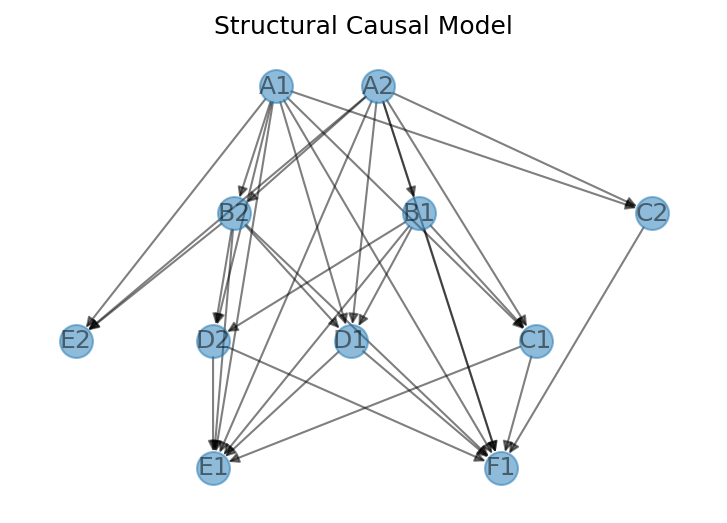

In [82]:
input_nodes = [2,2,2,2,2,1]
if __name__ == "__main__":  
    if type(input_nodes) == list:
        scm = create_scm_from_nodes_list(input_nodes)
    else:
        scm = create_scm_from_num_nodes(input_nodes)
    scm.plot(node_size=250);

In [83]:
scm.sample(100)

C:\Users\uvgupta\software\miniconda3\envs\cdt\lib\site-packages\scmodels\scm.py:286: SymPyDeprecationWarning: 

The numsamples parameter to sympy.stats.sample() is deprecated.
Either use a list comprehension, like

[sample(...) for i in range(100)]

or add a dimension to size, like

sample(..., size=(100,))

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-sympy-stats-numsamples
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  list(sample(noise_gen, numsamples=n, seed=seed)), dtype=float


,A1,A2,B1,B2,C2,C1,D1,D2,E2,E1,F1
0,48.909324,35.0,0.005165,132.818647,48.909324,22.077356,-48.578741,-112.577134,57213.058352,2.498230e+03,-1632.262833
1,21.584082,22.0,12.153478,129.920408,-110.415918,5554.204288,691.486276,-610.704274,32145.791622,3.391923e+06,49655.243531
2,37.307345,3.0,0.627574,114.922035,10.307345,84.310118,106.754176,-334.384465,37294.639572,2.820935e+04,-18698.618657
3,20.059911,8.0,1.683730,68.179733,20.059911,352.006763,446.478161,-132.454133,5465.346643,4.652939e+04,-15578.691493
4,13.073874,8.0,7.999993,47.221621,13.073874,4011.449137,485.851825,-79.411631,3306.432824,3.185398e+05,-6822.514294
...,...,...,...,...,...,...,...,...,...,...,...
95,8.335381,35.0,4.924755,60.006142,-166.664619,8268.100773,298.513547,-204.246511,1651.456762,1.688269e+06,46782.412124
96,28.675260,8.0,6.200560,122.701038,-27.324740,1100.164025,310.810069,-364.770090,15321.273878,4.013061e+05,-10271.259326
97,6.576609,8.0,7.999947,27.729827,-17.423391,716.835081,498.843372,-0.794977,893.246798,5.462502e+02,9198.610067
98,28.888813,8.0,0.297957,123.555252,-3.111187,510.562110,-0.556909,-1278.246705,28140.048462,6.526431e+05,-64487.456100


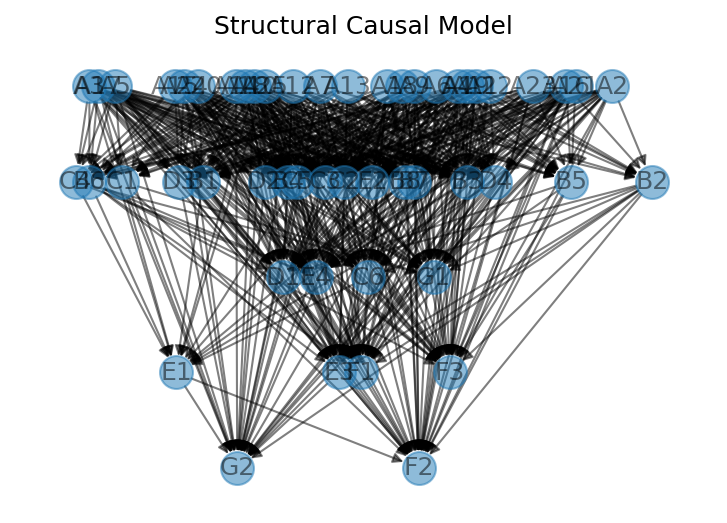

In [84]:
input_nodes = [25, 8, 6, 4, 4, 3, 2]
if __name__ == "__main__":  
    if type(input_nodes) == list:
        scm = create_scm_from_nodes_list(input_nodes)
    else:
        scm = create_scm_from_num_nodes(input_nodes)
    scm.plot(node_size=250);

In [85]:
scm.sample(100)

C:\Users\uvgupta\software\miniconda3\envs\cdt\lib\site-packages\scmodels\scm.py:286: SymPyDeprecationWarning: 

The numsamples parameter to sympy.stats.sample() is deprecated.
Either use a list comprehension, like

[sample(...) for i in range(100)]

or add a dimension to size, like

sample(..., size=(100,))

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-sympy-stats-numsamples
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  list(sample(noise_gen, numsamples=n, seed=seed)), dtype=float
<lambdifygenerated-1164>:2: RuntimeWarning: invalid value encountered in sqrt
  return -A12*A14*A9 - A22*A23*A25*N + sqrt(A1*A20*N + A10*A5 + A16 - A18 - A24 + A6 + A7)
<lambdifygenerated-1168>:2: RuntimeWarning: invalid value encountered in sqrt
  return A11*A4 + A21*A8*N - A25 + sqrt(-A1*A12*A16*A23 + A10 + A19*A9 + A2 + A6)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,C6,D1,E4,G1,E1,E3,F1,F3,F2,G2
0,1.240478,1.0,2.0,44.0,53.040042,5.0,26.0,1.0,-9.419258,16.522759,...,2.115211e+08,NaN,4.376684e+08,NaN,-2.125961e+08,-1.984408e+08,4.119638e+09,NaN,NaN,NaN
1,0.388828,2.0,2.0,25.0,256.049587,9.0,24.0,1.0,24.957922,-2.633325,...,4.343384e+08,NaN,9.884572e+05,-2.214008e+07,NaN,NaN,NaN,-1.737308e+09,NaN,NaN
2,0.185322,1.0,3.0,25.0,532.963813,9.0,26.0,2.0,11.221047,4.534575,...,5.377671e+06,207547.384200,2.453965e+07,3.400506e+07,3.447192e+07,-1.815212e+07,9.862745e+07,-1.618411e+07,-6.257384e+14,2.637173e+13
3,2.271651,1.0,1.0,10.0,6491.676017,1.0,24.0,2.0,5.369832,2.032788,...,4.663452e+08,NaN,2.229194e+12,NaN,-3.753470e+08,-4.672565e+08,3.755245e+09,NaN,NaN,NaN
4,0.186927,1.0,2.0,0.0,321.012489,10.0,26.0,2.0,3.208391,0.854099,...,7.324668e+10,46435.307828,-4.734222e+04,3.731100e+06,-7.324302e+10,-7.323984e+10,7.704769e+11,-2.197400e+11,5.364307e+21,3.060889e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.181364,4.0,2.0,25.0,466.347512,1.0,26.0,1.0,-17.812671,0.354386,...,1.177937e+04,NaN,-5.408920e+08,NaN,-3.461412e+06,-3.912263e+04,-1.252299e+07,NaN,NaN,NaN
96,1.279162,1.0,3.0,10.0,731.676717,1.0,24.0,3.0,7.713709,5.597349,...,2.707323e+13,NaN,-7.527123e+07,NaN,-2.707319e+13,-2.707316e+13,9.000144e+14,NaN,NaN,NaN
97,1.999959,1.0,2.0,10.0,2445.236782,10.0,24.0,2.0,24.528502,5.821097,...,6.245369e+05,NaN,-3.437798e+08,NaN,1.417637e+09,4.886507e+07,-3.862750e+07,NaN,NaN,NaN
98,1.175688,3.0,3.0,0.0,888.541257,12.0,26.0,1.0,-12.134320,8.574693,...,1.525714e+04,NaN,-2.792335e+08,NaN,7.212164e+08,-4.495675e+08,-6.707924e+05,NaN,NaN,NaN


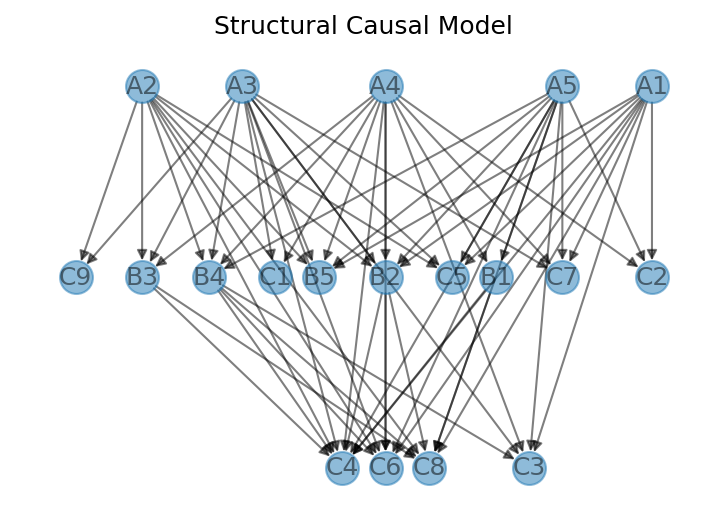

In [86]:
input_nodes = 30
if __name__ == "__main__":  
    if type(input_nodes) == list:
        scm = create_scm_from_nodes_list(input_nodes)
    else:
        scm = create_scm_from_num_nodes(input_nodes)
    scm.plot(node_size=250);

In [87]:
scm.sample(100)

C:\Users\uvgupta\software\miniconda3\envs\cdt\lib\site-packages\scmodels\scm.py:286: SymPyDeprecationWarning: 

The numsamples parameter to sympy.stats.sample() is deprecated.
Either use a list comprehension, like

[sample(...) for i in range(100)]

or add a dimension to size, like

sample(..., size=(100,))

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-sympy-stats-numsamples
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  list(sample(noise_gen, numsamples=n, seed=seed)), dtype=float


,A1,A2,A3,A4,A5,C9,B3,C1,B1,B2,B4,B5,C2,C5,C7,C3,C4,C6,C8
0,0.548228,0.319183,0.0,0.698146,0.0,0.221202,0.426097,3.254556,-19.291136,-0.349970,0.042936,1.017329,0.698146,-0.548228,0.000000,-0.210301,19.406867,-1.569148,-18.693686
1,1.514267,0.587410,0.0,0.453808,1.0,0.352453,0.590322,6.886177,-16.738201,-2.214677,0.487593,2.041218,1.514267,-0.926857,15.142670,1.003106,18.160688,-21.092371,5.642707
2,1.111476,1.853059,0.0,1.290026,0.0,3.217174,1.893245,-9.200066,-15.815596,-4.119260,0.093476,3.143084,0.000000,-1.111476,0.000000,0.075015,19.757965,-18.151548,38.396258
3,5.214854,0.852185,0.0,4.041912,0.0,1.111725,1.163722,21.117029,-29.525878,-13.332068,0.019403,4.894098,0.000000,-5.214854,0.000000,-4.969789,29.436575,-55.353401,7.891191
4,0.647597,0.614141,0.0,0.751116,0.0,1.772767,1.223992,7.357972,-10.748949,-1.193146,0.015201,1.365257,0.751116,-0.647597,0.000000,-0.576318,11.859184,-11.248938,-7.872527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.689627,0.227117,1.0,0.775504,10.0,2.072237,1.329880,-6.346234,1.321975,8.598412,6.768486,10.312994,6.896275,-9.935630,28.360603,53.560006,-164.100277,102.937264,-62.561726
96,1.440067,4.264668,1.0,0.037174,0.0,4.374382,5.265146,1.448085,-0.370594,-5.141410,-0.232877,2.861775,0.000000,-15.154811,0.037174,-4.146202,4.156889,-25.233201,10.499694
97,1.252334,1.721805,0.0,0.451596,4.0,1.380308,1.742282,2.424202,-0.879999,-0.349890,1.810397,6.173401,5.460932,5.634886,35.065350,18.289918,6.780947,4.369154,-44.298077
98,0.831771,3.115913,0.0,6.601889,0.0,1.659136,3.431288,91.095865,-79.745372,-5.183452,0.246458,9.717802,0.000000,-0.831771,0.000000,11.442837,104.193304,-18.079603,-59.915645
